In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

[  6.99079117  24.25982771  78.28497871 190.46440242]
4
2


C:\Users\sujith\AppData\Local\Temp\ipykernel_11032\1173688044.py:2: RankWarning: Polyfit may be poorly conditioned
  slope= np.polyfit(x_train, y_train, 3)


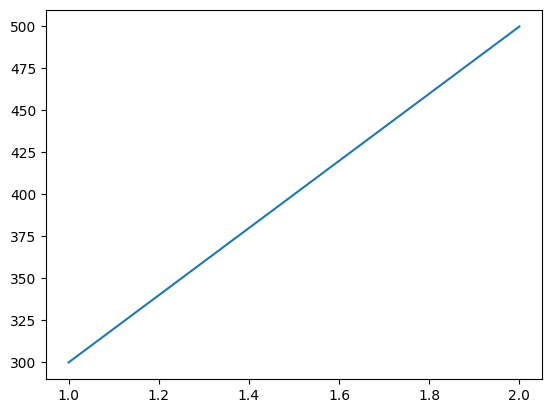

In [2]:
plt.plot(x_train,y_train)
slope= np.polyfit(x_train, y_train, 3)
print(slope)
w1,w2,w3,w4=slope
print(slope.size)
print(x_train.size)


In [3]:
def compute_model(x,slope):
    size=x.size
    print(size)
    ycap=np.zeros(size)
    print(ycap)

    for i in range(size):
        for j in range(slope.size-1):
            ycap[i]+=slope[j]*(x[i]**j+1)
            print(ycap[i])
        ycap[i]+=slope[3]
    return ycap


In [4]:
ypred=compute_model(x_train,slope)

2
[0. 0.]
13.981582334884614
62.50123774631146
219.0711951678383
13.981582334884614
86.7610654520249
478.18595900584205


In [5]:
print(ypred)

[409.53559758 668.65036142]


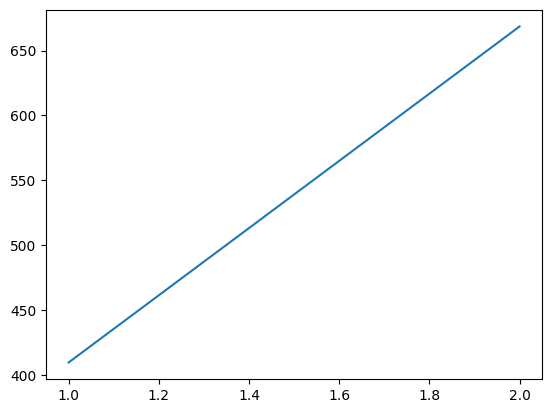

In [6]:
plt.plot(x_train,ypred)

In [7]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0]) 

In [8]:
def compute_cost(x,y,w,b):
    cost_sum=0
    for i in range(x.size):
        f_wb=w*x[i]+b
        cost_sum+=(f_wb-y[i])**2
    return 1/(2*x.size)*cost_sum


In [9]:
cost=compute_cost(x_train,y_train,100,100)

In [10]:
print(cost)

12500.0


In [11]:
def compute_gradient(x,y,w,b):

    m=x.size
    dj_dw=0
    dj_db=0
    for i in range(m):
        dj_dw_i=(w*x[i]+b-y[i])*x[i]
        dj_db_i=(w*x[i]+b-y[i])
        dj_db+=dj_db_i
        dj_dw+=dj_dw_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_db,dj_dw

    


In [12]:
def gradient_descent(x,y,w_in,b_in,alpha,iter,cost,gradient):

    j_history=[]
    p_history=[]
    b=b_in
    w=w_in

    for i in range(iter):
        dj_dw,dj_db=gradient(x,y,w,b)
        b=b-alpha*dj_db
        w=w-alpha*dj_dw

        if i<100000:  
            j_history.append(cost(x,y,w,b))
            p_history.append([w,b])
        if i% math.ceil(iter/10) == 0:
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, j_history, p_history #return w and J,w history for graphing


In [13]:
w_init=0
b_init=0

alpha=1.0e-2

w_final,b_final,j_hist,p_hist=gradient_descent(x_train,y_train,w_init,b_init,alpha,10000,compute_cost,compute_gradient)

Iteration    0: Cost 7.99e+04  dj_dw: -4.000e+02, dj_db: -6.500e+02   w:  4.000e+00, b: 6.50000e+00
Iteration 1000: Cost 3.04e+03  dj_dw:  1.248e+01, dj_db: -1.974e+01   w:  4.601e+01, b: 3.43485e+02
Iteration 2000: Cost 1.54e+04  dj_dw:  2.809e+01, dj_db: -4.442e+01   w: -1.465e+02, b: 6.47912e+02
Iteration 3000: Cost 7.80e+04  dj_dw:  6.322e+01, dj_db: -9.996e+01   w: -5.798e+02, b: 1.33296e+03
Iteration 4000: Cost 3.95e+05  dj_dw:  1.423e+02, dj_db: -2.249e+02   w: -1.555e+03, b: 2.87452e+03
Iteration 5000: Cost 2.00e+06  dj_dw:  3.201e+02, dj_db: -5.062e+02   w: -3.749e+03, b: 6.34348e+03
Iteration 6000: Cost 1.01e+07  dj_dw:  7.204e+02, dj_db: -1.139e+03   w: -8.686e+03, b: 1.41496e+04
Iteration 7000: Cost 5.13e+07  dj_dw:  1.621e+03, dj_db: -2.563e+03   w: -1.980e+04, b: 3.17158e+04
Iteration 8000: Cost 2.60e+08  dj_dw:  3.648e+03, dj_db: -5.768e+03   w: -4.480e+04, b: 7.12447e+04
Iteration 9000: Cost 1.32e+09  dj_dw:  8.209e+03, dj_db: -1.298e+04   w: -1.011e+05, b: 1.60196e+05


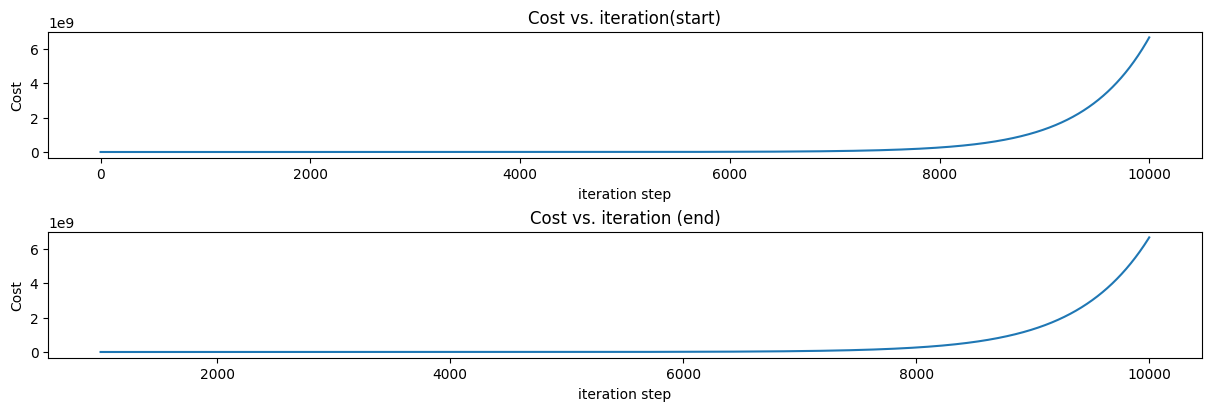

In [14]:
fig,(ax1,ax2)=plt.subplots(2,1,constrained_layout=True,figsize=(12,4))
ax1.plot(j_hist)
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [16]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [22]:
print(X_train.shape)

(3, 4)


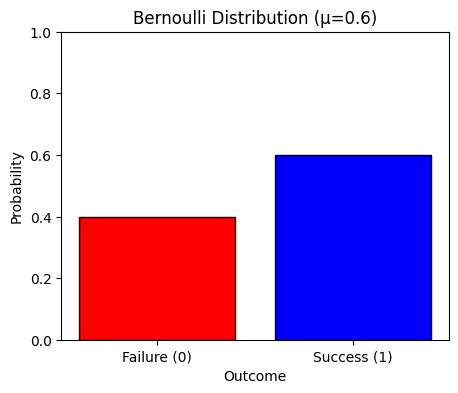

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mu = 0.6  # Probability of success
x_values = [0, 1]  # Possible outcomes (Failure, Success)
y_values = [1 - mu, mu]  # Probabilities of 0 and 1

# Plot
plt.figure(figsize=(5,4))
plt.bar(x_values, y_values, color=['red', 'blue'], edgecolor='black')
plt.xticks([0,1], labels=['Failure (0)', 'Success (1)'])
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.title(f"Bernoulli Distribution (μ={mu})")
plt.ylim(0,1)
plt.show()


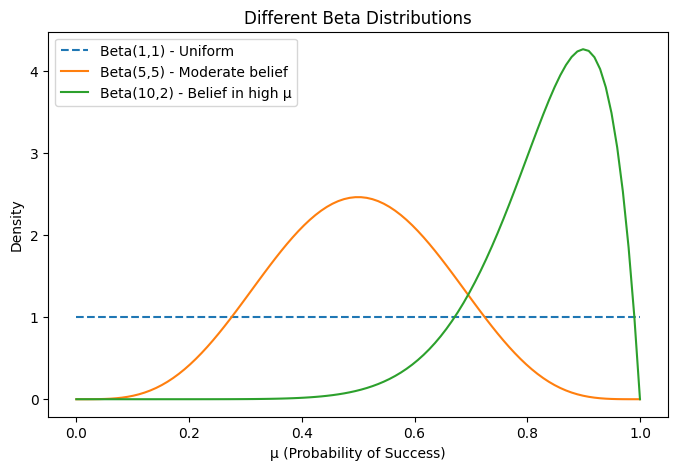

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define Beta distributions
x = np.linspace(0, 1, 100)
beta1 = stats.beta.pdf(x, 1, 1)  # Uniform (no prior knowledge)
beta2 = stats.beta.pdf(x, 5, 5)  # Prior belief centered at 0.5
beta3 = stats.beta.pdf(x, 10, 2) # Belief that μ is high

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, beta1, label="Beta(1,1) - Uniform", linestyle="dashed")
plt.plot(x, beta2, label="Beta(5,5) - Moderate belief")
plt.plot(x, beta3, label="Beta(10,2) - Belief in high μ")
plt.xlabel("μ (Probability of Success)")
plt.ylabel("Density")
plt.title("Different Beta Distributions")
plt.legend()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

NameError: name 'load_house_data' is not defined

In [ ]:
def zscore(X):
    mean=np.mean(X,axis=0)
    